# Classificação em Séries Temporais

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm as normal_dist
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

np.random.seed = 1

In [2]:
full_dataset = pd.read_csv('bvsp_labeled.csv')
full_dataset

,day,close,short_noise,long_noise,short_gradient,long_gradient,short_rel,long_rel,delta_score,partition_label
0,1995-03-31,3186.160010,0.021932,-0.036422,0.007632,-0.003423,0.711551,0.442295,1.007310,up
1,1995-04-03,3090.400000,-0.011969,-0.060544,0.003225,-0.005151,0.368251,0.381026,1.007310,up
2,1995-04-04,3064.260010,-0.022719,-0.062829,0.002448,-0.006041,0.239362,0.365761,1.007310,up
3,1995-04-05,3060.680029,-0.025728,-0.058215,0.001917,-0.006061,0.223630,0.375099,1.007310,up
4,1995-04-06,3086.500049,-0.020164,-0.044882,0.002710,-0.005642,0.125376,0.408346,1.007310,up
...,...,...,...,...,...,...,...,...,...,...
6057,2019-09-19,104133.800000,0.009661,0.019869,0.003070,-0.000100,0.997717,0.916868,1.005814,up
6058,2019-09-20,104397.000000,0.009219,0.022507,0.002967,-0.000059,1.000000,0.963806,1.005814,up
6059,2019-09-23,104588.600000,0.008400,0.024394,0.002649,-0.000010,1.000000,1.000000,1.005814,up
6060,2019-09-24,104440.400000,0.005109,0.022952,0.001853,-0.000010,0.908586,0.977791,1.005814,up


In [3]:
sampled = full_dataset.sample(frac=0.7).sort_index()
X = sampled['short_noise long_noise short_gradient long_gradient short_rel long_rel'.split()]
y = sampled['partition_label']

In [4]:
def test_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return {
        'model':  model_name,
        'acc': acc
    }

In [5]:
# def test(X, y):
#     tscv = TimeSeriesSplit(max_train_size=None, n_splits=7)
#     for train_index, test_index in tscv.split(X):
        
#         print(f'''train {sampled.day.iloc[train_index.min()]}..{sampled.day.iloc[train_index.max()]}, test {sampled.day.iloc[test_index.min()]}..{sampled.day.iloc[test_index.max()]}''')
#         print(f'({train_index.min(), train_index.max()}, {test_index.min(), test_index.max()})')
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
#         svc = SVC(kernel='linear')
#         svc.fit(X_train, y_train)
#         yield test_model('svc', svc, X_test, y_test)

#         svc_gamma = SVC(gamma='auto')
#         svc_gamma.fit(X_train, y_train)
#         yield test_model('svc_gamma', svc_gamma, X_test, y_test)

#         knn3 = KNeighborsClassifier(n_neighbors=3)
#         knn3.fit(X_train, y_train)
#         yield test_model('knn3', knn3, X_test, y_test)

#         knn5 = KNeighborsClassifier(n_neighbors=5)
#         knn5.fit(X_train, y_train)
#         yield test_model('knn5', knn5, X_test, y_test)

#         rfc = RandomForestClassifier(n_estimators=100)
#         rfc.fit(X_train, y_train)
#         yield test_model('rfc', rfc, X_test, y_test)

#         gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10)
#         gbc.fit(X_train, y_train)
#         yield test_model('gbc', gbc, X_test, y_test)
        
#         mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=100, activation='relu', max_iter=10000)
#         mlp.fit(X_train, y_train)
#         yield test_model('mlp', mlp, X_test, y_test)


# test_results = test(X, y)
# test_metrics = pd.DataFrame(test_results)
# metrics_grouped = test_metrics.groupby('model').agg(
#     acc_mean = ('acc', 'mean'),
#     acc_std = ('acc', 'std')
# )

# print(test_metrics.sort_values(by='acc', ascending=False)[:10])

# metrics_grouped.sort_values(by='acc_mean', ascending=False)

acc 0.8458289334741288


Text(0.5, 1.0, 'Model prediction')

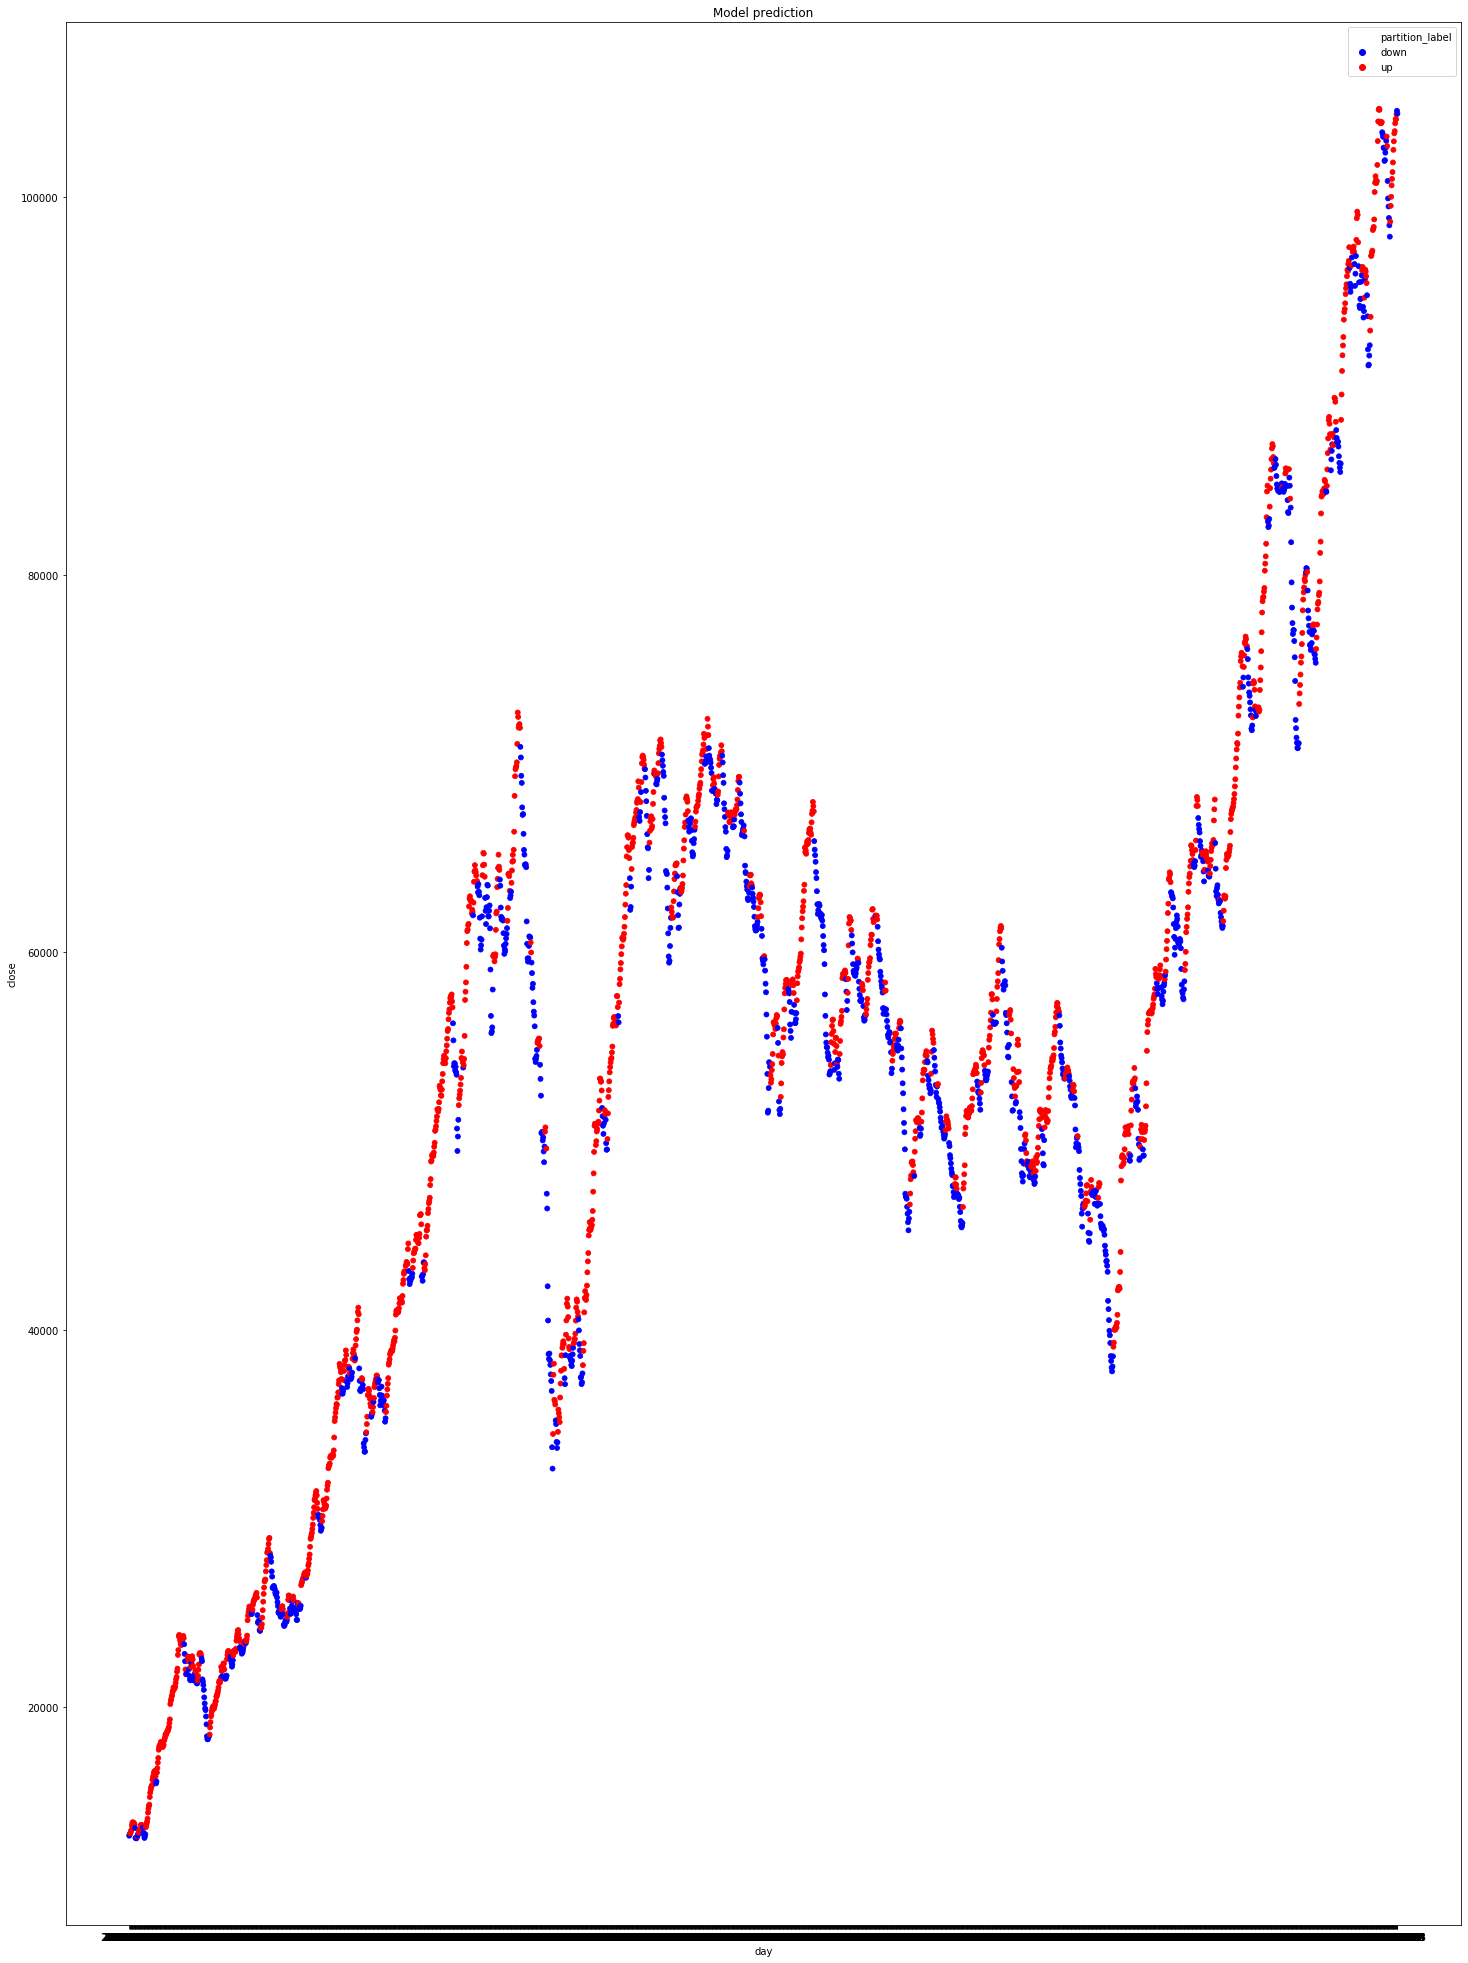

In [7]:
CUT_POINT = '2017-01-01' # 2013-08-12

X_train, X_test, y_train, y_test = X.loc[:CUT_POINT], X.loc[CUT_POINT:],y.loc[:CUT_POINT], y.loc[CUT_POINT:]

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'acc {acc}')

palette={
    'up': 'red',
    'down': 'blue',
    'unknown': 'gray'
}
plt.figure(figsize=(25, 35))
ax = plt.subplot(1, 1, 1)

t = sampled.loc[CUT_POINT:]

# sns.scatterplot(x='day', y='close', data=t,
#                 hue='partition_label', palette=palette,
#                 s=25, markers=['o'], edgecolor=None, legend='full', ax=ax)
# ax.set_title('Dataset Classification')

# ax = plt.subplot(1, 2, 2)

t = t.assign(partition_label=y_pred)

sns.scatterplot(x='day', y='close', data=t,
                hue='partition_label', palette=palette,
                s=25, markers=['o'], edgecolor=None, legend='full')
ax.set_title('Model prediction')

# ax.set_xlim(t.day.min(), t.day.max())

In [8]:
test_df = full_dataset[full_dataset.day > CUT_POINT]
test_df = test_df.set_index('day')
test_df['label'] = rfc.predict(test_df['short_noise long_noise short_gradient long_gradient short_rel long_rel'.split()])
test_df = test_df[['close', 'label']]
test_df.head()

,close,label
day,,
2017-01-02,59383.0,up
2017-01-03,60021.8,up
2017-01-04,60600.2,up
2017-01-05,61058.0,up
2017-01-06,61345.6,up


In [9]:
def backtest(test_df):
    cur_state = 0
    cash = [test_df.iloc[0].close]
    inv = [0]
    for i in range(1, len(test_df)):
    #     row = test_df['1995-01-01':'2017-01-01']
        row = test_df.iloc[i]
        op_price = (row.close + test_df.iloc[i - 1].close) / 2 
        if row.label == 'up':
            if cur_state == 0:
                cur_state = 1
                cash.append(cash[-1] - op_price)
                inv.append(inv[-1] + op_price)
            elif cur_state == 1:
                cash.append(cash[-1])
                inv.append(op_price)
            elif cur_state == -1:
                cur_state = 0
                cash.append(cash[-1] - op_price)
                inv.append(0)
        if row.label == 'down':
            if cur_state == 0:
                cur_state = -1
                cash.append(cash[-1] + op_price)
                inv.append(inv[-1] - op_price)
            elif cur_state == 1:
                cur_state = 0
                cash.append(cash[-1] + op_price)
                inv.append(0)
            elif cur_state == -1:
                cash.append(cash[-1])
                inv.append(-op_price)
    return pd.DataFrame({
        'day': test_df.reset_index().day,
        'close':test_df.reset_index().close,
        'label': test_df.reset_index().label,
        'cash': cash,
        'inv': inv,
        'bal': pd.Series(cash) + pd.Series(inv)
    })
backtest(test_df)

,day,close,label,cash,inv,bal
0,2017-01-02,59383.0,up,59383.0,0.0,59383.0
1,2017-01-03,60021.8,up,-319.4,59702.4,59383.0
2,2017-01-04,60600.2,up,-319.4,60311.0,59991.6
3,2017-01-05,61058.0,up,-319.4,60829.1,60509.7
4,2017-01-06,61345.6,up,-319.4,61201.8,60882.4
...,...,...,...,...,...,...
673,2019-09-19,104133.8,up,54881.1,104137.0,159018.1
674,2019-09-20,104397.0,up,54881.1,104265.4,159146.5
675,2019-09-23,104588.6,down,159373.9,0.0,159373.9
676,2019-09-24,104440.4,down,263888.4,-104514.5,159373.9


Text(0.5, 1, 'Model prediction')

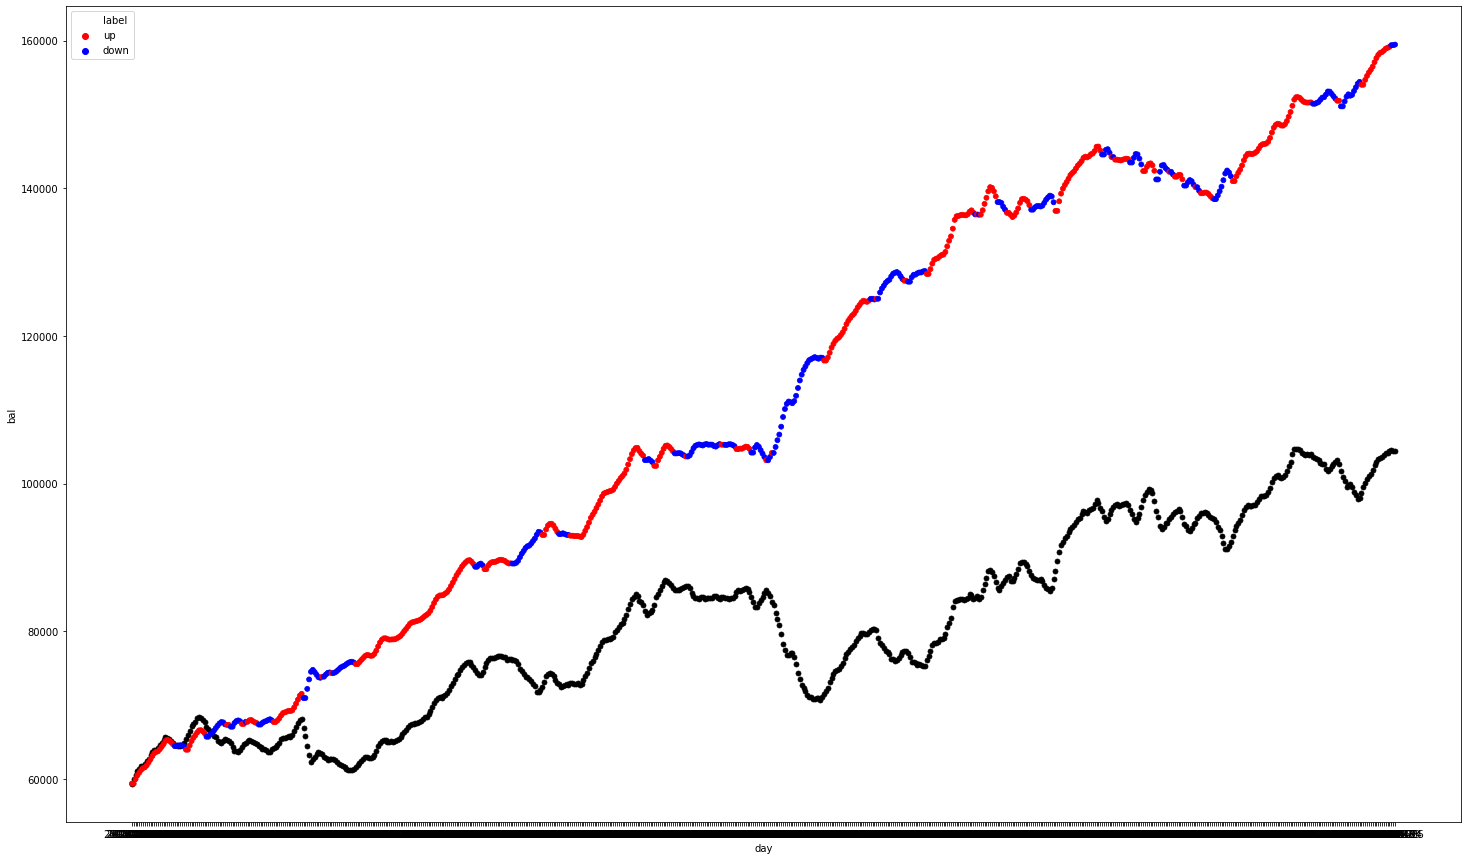

In [10]:
plt.figure(figsize=(25, 15))

t = backtest(test_df)
sns.scatterplot(x='day', y='close', data=t, color='black',
                s=25, markers=['o'], edgecolor=None, legend='full')

sns.scatterplot(x='day', y='bal', data=t,
                hue='label', palette=palette,
                s=25, markers=['o'], edgecolor=None, legend='full')
ax.set_title('Model prediction')